<a href="https://colab.research.google.com/github/farid-hamid/Diabetes-Topic-Modelling/blob/main/CGM_Discussion_Topic_Modelling_%2B_Analysis_with_BERTopic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Topic Modelling of Diabetes CGM Discussions using BERTopic** 🔡📊
---
*This notebook contains the implementation of NLP techniques to clean text data from online health communities and analyse the text corpus utilising Advanced Topic Modelling (Machine Learning Assisted) with the BERTopic model.

```
# This is formatted as code
```

*

# **Initial Importing & pip installation of relevant libraries** 📦

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from matplotlib import pyplot as plt
import seaborn as sns
import re

In [2]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
import string

In [4]:
import nltk

In [5]:
%pip install umap-learn

In [6]:
%pip install HDBSCAN

# **Data Cleaning and Natural Language Processing** 🧼📖
*Preparing the text corpus for upcoming topic modelling by normalising the data, removing polluting elements of user-generated data and appropriating document length using spaCy.*

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
df = pd.read_excel('/content/drive/MyDrive/BERTopic Modelling CGM Data/scraped_diabetes_discussion_data.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   subReddit            1000 non-null   object 
 1   Date of Post         1000 non-null   object 
 2   Title                995 non-null    object 
 3   Body Text            941 non-null    object 
 4   Top Comment          941 non-null    object 
 5   Top Comment Reply 1  551 non-null    object 
 6   Top Comment Reply 2  128 non-null    object 
 7   Top Comment Reply 3  38 non-null     object 
 8   Top Comment Reply 4  18 non-null     object 
 9   Top Comment Reply 5  0 non-null      float64
dtypes: float64(1), object(9)
memory usage: 78.2+ KB


In [9]:
df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   subReddit            1000 non-null   object 
 1   Date of Post         1000 non-null   object 
 2   Title                995 non-null    object 
 3   Body Text            941 non-null    object 
 4   Top Comment          941 non-null    object 
 5   Top Comment Reply 1  551 non-null    object 
 6   Top Comment Reply 2  128 non-null    object 
 7   Top Comment Reply 3  38 non-null     object 
 8   Top Comment Reply 4  18 non-null     object 
 9   Top Comment Reply 5  0 non-null      float64
dtypes: float64(1), object(9)
memory usage: 78.2+ KB


In [10]:
data = df

In [11]:
data.head()

,subReddit,Date of Post,Title,Body Text,Top Comment,Top Comment Reply 1,Top Comment Reply 2,Top Comment Reply 3,Top Comment Reply 4,Top Comment Reply 5
0,r/diabetes,2023-07-13 07:27:00,Freestyle Libre 2 Update Breaking App,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,r/diabetes,2023-07-13 07:29:00,There has been an update rolled out for the Fr...,It may be worth holding off updating until the...,NaN,NaN,NaN,NaN,NaN,NaN
2,r/diabetes,2023-07-13 07:33:00,NaN,Deleting the app and re-downloading it from th...,It's a shame it deletes all my data but yeah i...,NaN,NaN,NaN,NaN,NaN
3,r/diabetes,2023-07-13 07:39:00,NaN,I know 😭 It also disconnected me from my diabe...,Has it? I rang Abbott and they said everything...,NaN,NaN,NaN,NaN,NaN
4,r/diabetes,2023-07-14 09:53:00,NaN,I had to input my clinic code again but there ...,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#n = len(data)

In [13]:
data.drop(['Date of Post'], axis=1)


,subReddit,Title,Body Text,Top Comment,Top Comment Reply 1,Top Comment Reply 2,Top Comment Reply 3,Top Comment Reply 4,Top Comment Reply 5
0,r/diabetes,Freestyle Libre 2 Update Breaking App,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,r/diabetes,There has been an update rolled out for the Fr...,It may be worth holding off updating until the...,NaN,NaN,NaN,NaN,NaN,NaN
2,r/diabetes,NaN,Deleting the app and re-downloading it from th...,It's a shame it deletes all my data but yeah i...,NaN,NaN,NaN,NaN,NaN
3,r/diabetes,NaN,I know 😭 It also disconnected me from my diabe...,Has it? I rang Abbott and they said everything...,NaN,NaN,NaN,NaN,NaN
4,r/diabetes,NaN,I had to input my clinic code again but there ...,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
995,r/diabetes,Our son has recently moved to a Freestyle libr...,i used to wear them on the arm but kept knocki...,NaN,NaN,NaN,NaN,NaN,NaN
996,r/diabetes,Abbott will always replace. It is a pain but t...,We are still in the early days of this technol...,Skin tac is also good to keep them in place.,NaN,NaN,NaN,NaN,NaN
997,r/diabetes,I used to wear the original Libre sensors for ...,the main issue was getting them off again. But...,NaN,NaN,NaN,NaN,NaN,NaN
998,r/diabetes,Monitoring using Libre Link app,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#lowercase
data['Title'] = data['Title'].str.lower()
data['Body Text'] = data['Body Text'].str.lower()
data['Top Comment'] = data['Top Comment'].str.lower()
data['Top Comment Reply 1'] = data['Top Comment Reply 1'].str.lower()
data['Top Comment Reply 2'] = data['Top Comment Reply 2'].str.lower()
#data['Top Comment Reply 3'] = data['Top Comment Reply 3'].str.lower()
#data['Top Comment Reply 4'] = data['Top Comment Reply 4'].str.lower()

In [15]:
data.head()

,subReddit,Date of Post,Title,Body Text,Top Comment,Top Comment Reply 1,Top Comment Reply 2,Top Comment Reply 3,Top Comment Reply 4,Top Comment Reply 5
0,r/diabetes,2023-07-13 07:27:00,freestyle libre 2 update breaking app,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,r/diabetes,2023-07-13 07:29:00,there has been an update rolled out for the fr...,it may be worth holding off updating until the...,NaN,NaN,NaN,NaN,NaN,NaN
2,r/diabetes,2023-07-13 07:33:00,NaN,deleting the app and re-downloading it from th...,it's a shame it deletes all my data but yeah i...,NaN,NaN,NaN,NaN,NaN
3,r/diabetes,2023-07-13 07:39:00,NaN,i know 😭 it also disconnected me from my diabe...,has it? i rang abbott and they said everything...,NaN,NaN,NaN,NaN,NaN
4,r/diabetes,2023-07-14 09:53:00,NaN,i had to input my clinic code again but there ...,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
data.fillna('', inplace=True)
data['Discussion'] = data.apply(lambda row: ' '.join(row[['Title', 'Body Text', 'Top Comment', 'Top Comment Reply 1', 'Top Comment Reply 2']].values), axis=1)

<ipython-input-16-1a25f9faf64b>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.fillna('', inplace=True)


In [17]:
data.head()

,subReddit,Date of Post,Title,Body Text,Top Comment,Top Comment Reply 1,Top Comment Reply 2,Top Comment Reply 3,Top Comment Reply 4,Top Comment Reply 5,Discussion
0,r/diabetes,2023-07-13 07:27:00,freestyle libre 2 update breaking app,,,,,,,,freestyle libre 2 update breaking app
1,r/diabetes,2023-07-13 07:29:00,there has been an update rolled out for the fr...,it may be worth holding off updating until the...,,,,,,,there has been an update rolled out for the fr...
2,r/diabetes,2023-07-13 07:33:00,,deleting the app and re-downloading it from th...,it's a shame it deletes all my data but yeah i...,,,,,,deleting the app and re-downloading it from t...
3,r/diabetes,2023-07-13 07:39:00,,i know 😭 it also disconnected me from my diabe...,has it? i rang abbott and they said everything...,,,,,,i know 😭 it also disconnected me from my diab...
4,r/diabetes,2023-07-14 09:53:00,,i had to input my clinic code again but there ...,,,,,,,i had to input my clinic code again but there...


In [18]:
def remove_punctuation_and_emojis(text):
    if not isinstance(text, str):
        #if text is not a string, return it as it is
        return text

    punctuation = string.punctuation
    #punctuation translator
    translator = str.maketrans('', '', string.punctuation)
    #remove punctuation
    text = text.translate(translator)

    #regex pattern for emojis
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  #emoticons
                           u"\U0001F300-\U0001F5FF"  #symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  #transport & map symbols
                           u"\U0001F700-\U0001F77F"  #alchemical symbols
                           u"\U0001F780-\U0001F7FF"  #Geometric Shapes Extended
                           u"\U0001F800-\U0001F8FF"  #Supplemental Arrows-C
                           u"\U0001F900-\U0001F9FF"  #Supplemental Symbols and Pictographs
                           u"\U0001FA00-\U0001FA6F"  #Chess Symbols
                           u"\U0001FA70-\U0001FAFF"  #Symbols and Pictographs Extended-A
                           u"\U00002702-\U000027B0"  #Dingbats
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text) #removals

    return text

In [19]:
data['Discussion'] = data['Discussion'].apply(lambda x: remove_punctuation_and_emojis(x))

In [20]:
#removal of other incoherent chars
def remove_chars(text):

    if isinstance(text, str):
        #replace numbers with empty string, remove nd,rd,st, http and www, any strings longer than 26 chars
        text = re.sub(r'\d+', '', text)
        text = re.sub(r'\bnd\b|\b[a-zA-Z]{1,2}\b', '', text)
        text = re.sub(r'\brd\b|\b[a-zA-Z]{1,2}\b', '', text)
        text = re.sub(r'\bst\b|\b[a-zA-Z]{1,2}\b', '', text)
        text = re.sub(r'\bblah\b|\b[a-zA-Z]{1,2,3,4}\b', '', text)
        text = re.sub(r'https?://\S+|www\.\S+', '', text)
        text = re.sub(r'\b\w{26,}\b', '', text)
    return text


In [21]:
data['Discussion'] = data['Discussion'].apply(lambda x: remove_chars(x) if isinstance(x, str) else x)

In [22]:
data = data[data['Discussion'].apply(lambda x: len(x) >= 10)] #remove records which are too short and will pollute the model

In [23]:
def clean_text_digits(text):
    #Tokenize the text into words
    tokens = word_tokenize(text)


    translator = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(translator) for w in tokens]

    #Remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()and len(word) > 2]

    #join the list of words into a single string
    return ' '.join(words)

In [24]:
data['Discussion'] = data['Discussion'].apply(clean_text_digits)
df.head()

,subReddit,Date of Post,Title,Body Text,Top Comment,Top Comment Reply 1,Top Comment Reply 2,Top Comment Reply 3,Top Comment Reply 4,Top Comment Reply 5,Discussion
0,r/diabetes,2023-07-13 07:27:00,freestyle libre 2 update breaking app,,,,,,,,freestyle libre update breaking app
1,r/diabetes,2023-07-13 07:29:00,there has been an update rolled out for the fr...,it may be worth holding off updating until the...,,,,,,,there has been update rolled out for the free...
2,r/diabetes,2023-07-13 07:33:00,,deleting the app and re-downloading it from th...,it's a shame it deletes all my data but yeah i...,,,,,,deleting the app and redownloading from the ...
3,r/diabetes,2023-07-13 07:39:00,,i know 😭 it also disconnected me from my diabe...,has it? i rang abbott and they said everything...,,,,,,know also disconnected from diabetic cli...
4,r/diabetes,2023-07-14 09:53:00,,i had to input my clinic code again but there ...,,,,,,,had input clinic code again but there seem...


In [25]:
#lemmatization
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer


In [26]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [27]:
#part of speech tagging function
# def get_wordnet_pos(word):
#     tag = nltk.pos_tag([word])[0][1][0].upper()
#     tag_dictionary = {"J": wordnet.ADJ,
#                 "N": wordnet.NOUN,
#                 "V": wordnet.VERB,
#                 "R": wordnet.ADV}

#     return tag_dictionary.get(tag, wordnet.NOUN)

In [28]:
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    #tokenize text to words
    words = word_tokenize(text)
    #lemmatize each word with pos tags
    return ' '.join([lemmatizer.lemmatize(w) for w in words])

In [29]:
data['Discussion'] = data['Discussion'].apply(lambda x: lemmatize_text(x) if isinstance(x, str) else x)

In [30]:
data.head()

,subReddit,Date of Post,Title,Body Text,Top Comment,Top Comment Reply 1,Top Comment Reply 2,Top Comment Reply 3,Top Comment Reply 4,Top Comment Reply 5,Discussion
0,r/diabetes,2023-07-13 07:27:00,freestyle libre 2 update breaking app,,,,,,,,freestyle libre update breaking app
1,r/diabetes,2023-07-13 07:29:00,there has been an update rolled out for the fr...,it may be worth holding off updating until the...,,,,,,,there ha been update rolled out for the freest...
2,r/diabetes,2023-07-13 07:33:00,,deleting the app and re-downloading it from th...,it's a shame it deletes all my data but yeah i...,,,,,,deleting the app and redownloading from the pu...
3,r/diabetes,2023-07-13 07:39:00,,i know 😭 it also disconnected me from my diabe...,has it? i rang abbott and they said everything...,,,,,,know also disconnected from diabetic clinic li...
4,r/diabetes,2023-07-14 09:53:00,,i had to input my clinic code again but there ...,,,,,,,had input clinic code again but there seems ga...


In [31]:
df2 = data.copy()

In [32]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   subReddit            1000 non-null   object
 1   Date of Post         1000 non-null   object
 2   Title                1000 non-null   object
 3   Body Text            1000 non-null   object
 4   Top Comment          1000 non-null   object
 5   Top Comment Reply 1  1000 non-null   object
 6   Top Comment Reply 2  1000 non-null   object
 7   Top Comment Reply 3  1000 non-null   object
 8   Top Comment Reply 4  1000 non-null   object
 9   Top Comment Reply 5  1000 non-null   object
 10  Discussion           1000 non-null   object
dtypes: object(11)
memory usage: 86.1+ KB


# **UMAP for Dimensionality Reduction & HDBSCAN for Clustering of topics**🪣
*Sub-model configuration to be fed into BERTopic model.*

In [33]:
from umap import UMAP
from hdbscan import HDBSCAN

umap_model = UMAP(n_neighbors=3, n_components=3, min_dist=0.02, random_state=42)
hdbscan_model = HDBSCAN(min_cluster_size=30, min_samples=15,
                        prediction_data=True, gen_min_span_tree=True)

In [34]:
%pip install bertopic

In [35]:
#nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.util import ngrams

In [36]:
from tqdm.auto import tqdm

In [37]:
n = len(df2)

In [38]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer


# **Stopwords Removal and Initiation of Vectorizer sub model**📑
A list of words which are extremely common in the use case and pollutants to the unsupervised learning algorithm pipeline being implemented. These are injected into the vectorizer sub model.



In [39]:
from nltk.corpus import stopwords
stopwords = list(stopwords.words('english')) + ['thank','yeah','sensor','insurance','prescription','help','yes','no','yet',
                                                'still','wa','ha','great','good','job','good job','one day', 'authorization', 'cost',
                                                'service','medical','covered','freestyle','company','tempo','glucose','cover',
                                                'mgdl','reading','lot','wanting','want','hours','months','readings','question',
                                                'since','day','night','first','last','started','ago','dont','using','use','pump',
                                                'loss','around','new','phone','put','days','app', 'mmol','mmoll', 'drug','heck',
                                                'the','http', 'https', 'amp', 'com', 'one', 'www', 'anyone', 'can', 'CVS', 'insurance',
                                                'get', 'like', 'back', 'ive', 'would', 'omnipod', 'pharmacy', 'medtronic', 'to',
                                                'turn','up','out','price', 'cgm','sugar','finger','prick','time','really','else',
                                                'anybody','wait','blood','also','insulin','know','still','feel','got','thank',
                                                'thanks','think','numbers','stick','going','check','about','even','too','always',
                                                'much','be','how','yeah','pocket','yeah yeah','for','months','invite','follower',
                                                'anonymous','anonymously']
vectorizer_model = CountVectorizer(ngram_range=(1, 3), stop_words=stopwords)

# **Embedding Text with Sentence Transformers**🤖
*Leveraging sentence transformers, documents in the text corpus are embedded in small batches for quality. These embeddings are saved in the* embeds *variable for later on, when the topic labels are extracted and they can be combined with the embedded dataset.*

In [40]:
#n = len(df2)
embedding_model = SentenceTransformer('all-MiniLM-L6-v2')
embeds = np.zeros((n, embedding_model.get_sentence_embedding_dimension()))
texts = df2['Discussion'].tolist()


In [41]:
#texts

In [42]:
batch_size=15


In [43]:
 for i in tqdm(range(0,n,batch_size)):
     i_end = min(i+batch_size,n)
     batch = df2['Discussion'].iloc[i:i_end].tolist()
     batch_embed = embedding_model.encode(batch)
     embeds[i:i_end,:] = batch_embed

  0%|          | 0/67 [00:00<?, ?it/s]

# **Representation sub-models**🌍
*Using keyBERT and Maximal Marginal Relevance to generate coherent topic labels which describe the pain point narrative in a piece of dialogue.*

In [44]:
from bertopic.representation import KeyBERTInspired, MaximalMarginalRelevance, TextGeneration
from transformers import pipeline

In [45]:
keybert = KeyBERTInspired()
mmr = MaximalMarginalRelevance(diversity=0.3)

representation_model = {
    "KeyBERT": keybert,
    "MMR": mmr,

}

# **BERTopic Model**💻
---
*The BERTopic model, consisting of a pipeline of unsupervised machine learning algorithms through its UMAP (dimensionality reduction), HDBSCAN (clustering with noise), text embedding, vectorisation and represenation sub-models, is initiated and trained below.*


In [46]:
BERTopic_model = BERTopic(
    #sub-models:
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    embedding_model=embedding_model,
    vectorizer_model=vectorizer_model,
    representation_model=representation_model,
    #hyper-parameters:
    min_topic_size = 35,#careful with tuning this parameter
    top_n_words=10,
    #nr_topics= 8,
    language='english',
    calculate_probabilities=True,
    verbose=True

)
#Train model:
topics, probs = BERTopic_model.fit_transform(texts, embeddings=embeds)

2024-08-31 17:24:43,971 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-08-31 17:24:55,778 - BERTopic - Dimensionality - Completed ✓
2024-08-31 17:24:55,779 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-31 17:24:55,857 - BERTopic - Cluster - Completed ✓
2024-08-31 17:24:55,864 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-31 17:25:07,124 - BERTopic - Representation - Completed ✓


In [73]:
!pip install openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.7/365.7 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.2 MB/s eta 0:00:00


In [48]:
for i in range(10):
    print(f"{topics[i]}: {df2['Discussion'][i]}")

0: freestyle libre update breaking app
4: there ha been update rolled out for the freestyle libre app that mean that you longer need scan for reading however after installing breaking the app for many and the download for the app ha been removed from the io app store for the least may worth holding off updating until they fix
9: deleting the app and redownloading from the purchased page appstore did the trick it shame deletes all data but yeah worked
5: know also disconnected from diabetic clinic libreview thing well ha rang abbott and they said everything libreview should still work the data phone gone tho
5: had input clinic code again but there seems gap the data they able view all goo
0: where about are you located the app the store ha been removed and only the freestyle libre app available this work the the main page app store click your picture the top right click purchased and find there
0: the too but this trick worked not able see librelink app store well but can still redownl

In [49]:
BERTopic_model.visualize_barchart()

In [50]:
!pip install -U plotly==5.19.0

In [51]:
import numpy as scp
BERTopic_model.visualize_hierarchy()

In [53]:
#run this cell if rows are removed in NLP text cleaning, the index needs to be reset for visualize_documents() function to work
df2.reset_index(drop=True, inplace=True)

In [54]:
BERTopic_model.visualize_documents(df2['Discussion'], embeddings=embeds)

<Axes: ylabel='$\\lambda$ value'>

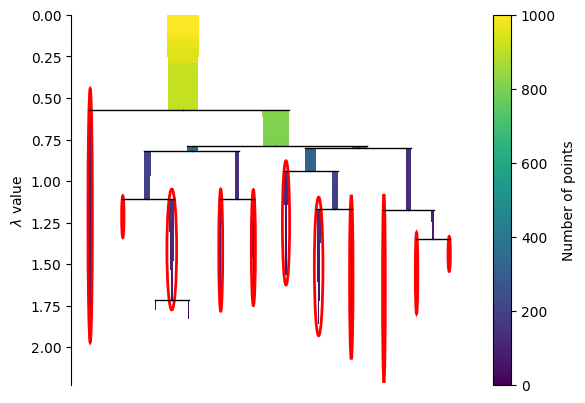

In [55]:
hdbscan_model.condensed_tree_.plot(select_clusters=True)

In [56]:
import plotly.express as px

In [57]:
assert len(topics) == len(df2)

In [58]:
df2['Topic'] = topics

In [59]:
df2.head()

,subReddit,Date of Post,Title,Body Text,Top Comment,Top Comment Reply 1,Top Comment Reply 2,Top Comment Reply 3,Top Comment Reply 4,Top Comment Reply 5,Discussion,Topic
0,r/diabetes,2023-07-13 07:27:00,freestyle libre 2 update breaking app,,,,,,,,freestyle libre update breaking app,0
1,r/diabetes,2023-07-13 07:29:00,there has been an update rolled out for the fr...,it may be worth holding off updating until the...,,,,,,,there ha been update rolled out for the freest...,4
2,r/diabetes,2023-07-13 07:33:00,,deleting the app and re-downloading it from th...,it's a shame it deletes all my data but yeah i...,,,,,,deleting the app and redownloading from the pu...,9
3,r/diabetes,2023-07-13 07:39:00,,i know 😭 it also disconnected me from my diabe...,has it? i rang abbott and they said everything...,,,,,,know also disconnected from diabetic clinic li...,5
4,r/diabetes,2023-07-14 09:53:00,,i had to input my clinic code again but there ...,,,,,,,had input clinic code again but there seems ga...,5


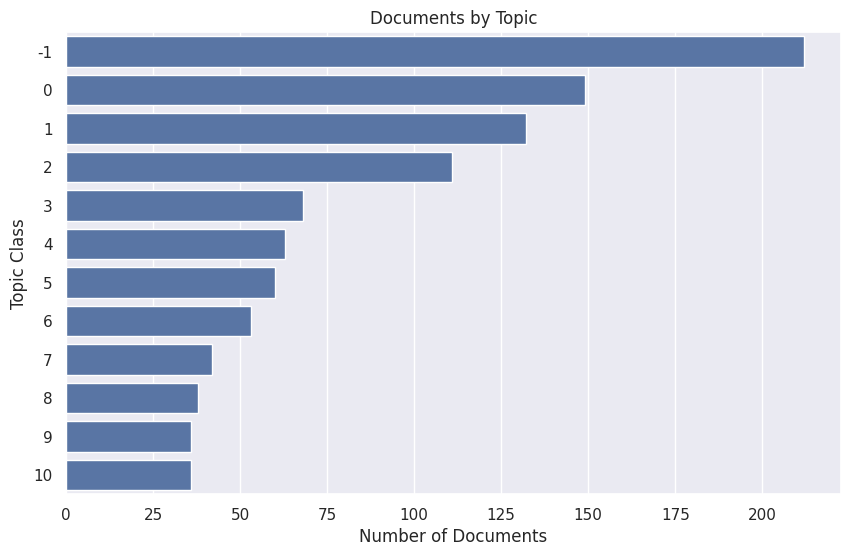

In [60]:
topic_counts = df2['Topic'].value_counts()
#data.drop(['Contains_Keywords'], axis=1)

sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.countplot(y='Topic', data=df2, order = topic_counts.index)


plt.title('Documents by Topic')
plt.xlabel('Number of Documents')
plt.ylabel('Topic Class')


plt.show()

In [61]:
topic_distr, _ = BERTopic_model.approximate_distribution(texts)

100%|██████████| 1/1 [00:01<00:00,  1.15s/it]


In [62]:
BERTopic_model.visualize_distribution(topic_distr[1])

In [63]:
probs

array([[1.00000000e+000, 5.88041543e-309, 4.13319135e-309, ...,
        4.23497416e-309, 3.72184600e-308, 4.27362115e-309],
       [1.07560018e-001, 4.69032963e-002, 2.62222236e-002, ...,
        2.77134279e-002, 5.78629253e-002, 2.70668736e-002],
       [4.31685861e-308, 5.54484356e-309, 4.09491639e-309, ...,
        4.11683062e-309, 1.00000000e+000, 4.14957230e-309],
       ...,
       [2.70853468e-002, 3.01941586e-002, 2.73371121e-002, ...,
        2.09342996e-002, 2.33846099e-002, 2.08175549e-002],
       [2.13832165e-308, 9.52269887e-309, 5.65100978e-309, ...,
        5.95414851e-309, 1.13645560e-308, 5.99677549e-309],
       [2.80542303e-002, 2.64486088e-001, 4.26739381e-002, ...,
        4.78475015e-002, 2.21212109e-002, 4.09439353e-002]])

In [64]:
topic_distr, topic_token_distr = BERTopic_model.approximate_distribution(texts, calculate_tokens=True)
topic_dist_df = BERTopic_model.visualize_approximate_distribution(texts[1], topic_token_distr[1])


100%|██████████| 1/1 [00:02<00:00,  2.70s/it]


In [65]:
topic_dist_df

,there,ha,been,update,rolled,out,for,the,freestyle,libre,app,that,mean,that,you,longer,need,scan,for,reading,however,after,installing,breaking,the,app,for,many,and,the,download,for,the,app,ha,been,removed,from,the,io,app,store,for,the,least,may,worth,holding,off,updating,until,they,fix
0_libre_update_signal_bluetooth,0.230,0.230,0.230,0.230,0.000,0.000,0.296,0.592,0.888,0.888,0.592,0.296,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.150,0.150,0.150,0.150,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1_libre_low_hour_level,0.000,0.000,0.000,0.000,0.000,0.000,0.290,0.579,0.869,0.869,0.579,0.290,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3_libre_dexcom_month_need,0.000,0.000,0.000,0.000,0.000,0.000,0.263,0.526,0.789,0.789,0.526,0.263,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4_watch_libre_data_reader,0.000,0.000,0.000,0.000,0.000,0.000,0.233,0.466,0.700,0.700,0.466,0.233,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
5_libre_abbott_replacement_call,0.000,0.000,0.000,0.000,0.000,0.000,0.181,0.362,0.543,0.543,0.362,0.181,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
8_dexcom_libre_used_xdrip,0.000,0.000,0.000,0.000,0.000,0.000,0.180,0.360,0.540,0.540,0.360,0.180,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
9_scan_problem_worked_pixel,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.123,0.224,0.224,0.224,0.101,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [66]:
BERTopic_model.visualize_term_rank(log_scale=True)

# **BERTopic Model Output Evaluation**🧪
---



# **Coherence**
*By qualitatively comparing the representations generated by the topic model, it is evident that they are coherent and diverse, where each topic is represented by uniques phrases and terms related to specific niches in CGMs usage.*

In [67]:
coherence = BERTopic_model.get_topic_info(); coherence.head(10)

,Topic,Count,Name,Representation,KeyBERT,MMR,Representative_Docs
0,-1,212,-1_alarm_libre_low_alert,"[alarm, libre, low, alert, signal, need, dexco...","[low alarm, signal alarm, alarm, alert, apps, ...","[alarm, libre, alert, dexcom, iphone, scan, se...",[alarm not going off android wife pixel androi...
1,0,149,0_libre_update_signal_bluetooth,"[libre, update, signal, bluetooth, issue, io, ...","[iphone io, librelink, libreview, librelinkup,...","[libre, update, bluetooth, iphone, android, li...",[librelink iphone io freestyle libre problem h...
2,1,132,1_libre_low_hour_level,"[libre, low, hour, level, alarm, arm, accurate...","[glucometer, diabetes, low alarm, meter, accur...","[libre, hour, alarm, accurate, meter, test, fl...",[new sensor low glucose throughout the day pre...
3,2,111,2_arm_skin_adhesive_pain,"[arm, skin, adhesive, pain, dexcom, patch, lib...","[alarm, wake, right arm, compression low, left...","[arm, adhesive, pain, dexcom, patch, side, tap...",[sleeping through low use fsl pretty consisten...
4,3,68,3_libre_dexcom_month_need,"[libre, dexcom, month, need, year, better, eve...","[libre dexcom, dexcom libre, dexcom receiver, ...","[dexcom, month, free, libre plus, type, receiv...",[anyone have experience with eversense cgm see...
5,4,63,4_watch_libre_data_reader,"[watch, libre, data, reader, apple, apple watc...","[apple watch, smart watch, galaxy watch, garmi...","[reader, apple watch, android, garmin, xdrip, ...",[libre app apple watch hey folk people libre r...
6,5,60,5_libre_abbott_replacement_call,"[libre, abbott, replacement, call, work, bad, ...","[libre, faulty, call abbott, bad batch, failur...","[libre, abbott, call, replace, failure, issue,...",[second bad freestyle libre sensor one day had...
7,6,53,6_low_spike_eat_food,"[low, spike, eat, food, eating, high, make, ye...","[diabetes, diabetic, dexcom, diagnosed, health...","[low, spike, eat, dexcom, diabetes, type, diag...",[dexcom freestyle libre newly diagnosed and do...
8,7,42,7_dexcom_low_calibrate_calibration,"[dexcom, low, calibrate, calibration, minute, ...","[dexcom, meter, calibrate, panic, urgent low, ...","[dexcom, low, calibrate, calibration, hour, me...",[dexcom reading fluctuation first week with th...
9,8,38,8_dexcom_libre_used_xdrip,"[dexcom, libre, used, xdrip, people, experienc...","[dexcom libre, libre dexcom, experience dexcom...","[dexcom, libre, xdrip, patch, dexcom libre, de...",[dexcom libre howdy have switch from the libre...


In [68]:
coherence_df = coherence

In [69]:
coherence_df

,Topic,Count,Name,Representation,KeyBERT,MMR,Representative_Docs
0,-1,212,-1_alarm_libre_low_alert,"[alarm, libre, low, alert, signal, need, dexco...","[low alarm, signal alarm, alarm, alert, apps, ...","[alarm, libre, alert, dexcom, iphone, scan, se...",[alarm not going off android wife pixel androi...
1,0,149,0_libre_update_signal_bluetooth,"[libre, update, signal, bluetooth, issue, io, ...","[iphone io, librelink, libreview, librelinkup,...","[libre, update, bluetooth, iphone, android, li...",[librelink iphone io freestyle libre problem h...
2,1,132,1_libre_low_hour_level,"[libre, low, hour, level, alarm, arm, accurate...","[glucometer, diabetes, low alarm, meter, accur...","[libre, hour, alarm, accurate, meter, test, fl...",[new sensor low glucose throughout the day pre...
3,2,111,2_arm_skin_adhesive_pain,"[arm, skin, adhesive, pain, dexcom, patch, lib...","[alarm, wake, right arm, compression low, left...","[arm, adhesive, pain, dexcom, patch, side, tap...",[sleeping through low use fsl pretty consisten...
4,3,68,3_libre_dexcom_month_need,"[libre, dexcom, month, need, year, better, eve...","[libre dexcom, dexcom libre, dexcom receiver, ...","[dexcom, month, free, libre plus, type, receiv...",[anyone have experience with eversense cgm see...
5,4,63,4_watch_libre_data_reader,"[watch, libre, data, reader, apple, apple watc...","[apple watch, smart watch, galaxy watch, garmi...","[reader, apple watch, android, garmin, xdrip, ...",[libre app apple watch hey folk people libre r...
6,5,60,5_libre_abbott_replacement_call,"[libre, abbott, replacement, call, work, bad, ...","[libre, faulty, call abbott, bad batch, failur...","[libre, abbott, call, replace, failure, issue,...",[second bad freestyle libre sensor one day had...
7,6,53,6_low_spike_eat_food,"[low, spike, eat, food, eating, high, make, ye...","[diabetes, diabetic, dexcom, diagnosed, health...","[low, spike, eat, dexcom, diabetes, type, diag...",[dexcom freestyle libre newly diagnosed and do...
8,7,42,7_dexcom_low_calibrate_calibration,"[dexcom, low, calibrate, calibration, minute, ...","[dexcom, meter, calibrate, panic, urgent low, ...","[dexcom, low, calibrate, calibration, hour, me...",[dexcom reading fluctuation first week with th...
9,8,38,8_dexcom_libre_used_xdrip,"[dexcom, libre, used, xdrip, people, experienc...","[dexcom libre, libre dexcom, experience dexcom...","[dexcom, libre, xdrip, patch, dexcom libre, de...",[dexcom libre howdy have switch from the libre...


In [70]:
df2.to_excel('/content/drive/MyDrive/BERTopic Modelling CGM Data/BERTopic Output.xlsx')

In [ ]:
coherence_df.to_excel('/content/drive/MyDrive/BERTopic Modelling CGM Data/BERTopic Coherence.xlsx')